<a href="https://colab.research.google.com/github/aaron-v19/mlprojects/blob/main/Beatrice_wind_farm/Beatrice_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Getting Data

In [2]:
!pip install --upgrade --no-cache-dir rapidsai-csp-utils[cuda11x] rapids cudf cuml

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
ERROR: Could not find a version that satisfies the requirement rapidsai-csp-utils[cuda11x] (from versions: none)
ERROR: No matching distribution found for rapidsai-csp-utils[cuda11x]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
data=pd.read_csv('/content/drive/MyDrive/Windmill project/Beatrice.csv')
data2=pd.read_csv('/content/drive/MyDrive/Windmill project/Beatrice_data_part2.csv')

# 2. Initial Exploration

###Fixing the data type for time column in both dataframes


Split Time to make 2 more columns month and year

In [27]:
# add columns for year and month
data['time'] = pd.to_datetime(data['time'], format='%d-%m-%Y %H:%M')
print("Updated Information for DataFrame1:")

data['year']=data['time'].dt.year
data['month']=data['time'].dt.month

data.info()

Updated Information for DataFrame1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350640 entries, 0 to 350639
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Unnamed: 0                 350640 non-null  int64         
 1   time                       350640 non-null  datetime64[ns]
 2   u100                       350640 non-null  float64       
 3   v100                       350640 non-null  float64       
 4   fsr                        350640 non-null  float64       
 5   Windspeed                  350640 non-null  float64       
 6   Scaled_Windspeed_(at_90m)  350640 non-null  float64       
 7   Wind_Direction             350640 non-null  float64       
 8   Power_of_SWT-7.0-154       350640 non-null  float64       
 9   Turn_off                   350640 non-null  int64         
 10  Power                      350640 non-null  float64       
 11  year            

In [28]:
data.head()

,Unnamed: 0,time,u100,v100,fsr,Windspeed,Scaled_Windspeed_(at_90m),Wind_Direction,Power_of_SWT-7.0-154,Turn_off,Power,year,month
0,0,1980-01-01 00:00:00,1.808975,-10.229706,0.000261,10.388420,10.150733,100.028260,378.95800,1,378.95800,1980,1
1,1,1980-01-01 01:00:00,1.916092,-10.346832,0.000242,10.522754,10.281994,100.491540,390.87520,1,390.87520,1980,1
2,2,1980-01-01 02:00:00,1.940201,-10.212601,0.000230,10.395267,10.157425,100.756920,379.56732,1,379.56732,1980,1
3,3,1980-01-01 03:00:00,2.296951,-10.099304,0.000224,10.357217,10.120245,102.813194,376.18005,1,376.18005,1980,1
4,4,1980-01-01 04:00:00,2.725143,-10.351501,0.000238,10.704205,10.459293,104.749070,406.82446,1,406.82446,1980,1


In [29]:
data2['time'] = pd.to_datetime(data2['time'], format='%Y-%m-%dT%H:%M', errors='coerce')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350640 entries, 0 to 350639
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   time                350640 non-null  datetime64[ns]
 1   precipitation (mm)  350640 non-null  float64       
 2   rain (mm)           350640 non-null  float64       
 3   snowfall (cm)       350640 non-null  float64       
 4   pressure_msl (hPa)  350640 non-null  float64       
 5   filler              0 non-null       float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 16.1 MB


In [30]:
data2.head()

,time,precipitation (mm),rain (mm),snowfall (cm),pressure_msl (hPa),filler
0,1980-01-01 00:00:00,0.0,0.0,0.0,1001.7,NaN
1,1980-01-01 01:00:00,0.1,0.1,0.0,1001.1,NaN
2,1980-01-01 02:00:00,0.0,0.0,0.0,1001.3,NaN
3,1980-01-01 03:00:00,0.0,0.0,0.0,1000.8,NaN
4,1980-01-01 04:00:00,0.1,0.1,0.0,1000.9,NaN


### Merging both dataset based on time column

In [31]:
data=pd.merge(data,data2,on='time')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350640 entries, 0 to 350639
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Unnamed: 0                 350640 non-null  int64         
 1   time                       350640 non-null  datetime64[ns]
 2   u100                       350640 non-null  float64       
 3   v100                       350640 non-null  float64       
 4   fsr                        350640 non-null  float64       
 5   Windspeed                  350640 non-null  float64       
 6   Scaled_Windspeed_(at_90m)  350640 non-null  float64       
 7   Wind_Direction             350640 non-null  float64       
 8   Power_of_SWT-7.0-154       350640 non-null  float64       
 9   Turn_off                   350640 non-null  int64         
 10  Power                      350640 non-null  float64       
 11  year                       350640 non-null  int32   

In [33]:
data.head()

,Unnamed: 0,time,u100,v100,fsr,Windspeed,Scaled_Windspeed_(at_90m),Wind_Direction,Power_of_SWT-7.0-154,Turn_off,Power,year,month,precipitation (mm),rain (mm),snowfall (cm),pressure_msl (hPa),filler
0,0,1980-01-01 00:00:00,1.808975,-10.229706,0.000261,10.388420,10.150733,100.028260,378.95800,1,378.95800,1980,1,0.0,0.0,0.0,1001.7,NaN
1,1,1980-01-01 01:00:00,1.916092,-10.346832,0.000242,10.522754,10.281994,100.491540,390.87520,1,390.87520,1980,1,0.1,0.1,0.0,1001.1,NaN
2,2,1980-01-01 02:00:00,1.940201,-10.212601,0.000230,10.395267,10.157425,100.756920,379.56732,1,379.56732,1980,1,0.0,0.0,0.0,1001.3,NaN
3,3,1980-01-01 03:00:00,2.296951,-10.099304,0.000224,10.357217,10.120245,102.813194,376.18005,1,376.18005,1980,1,0.0,0.0,0.0,1000.8,NaN
4,4,1980-01-01 04:00:00,2.725143,-10.351501,0.000238,10.704205,10.459293,104.749070,406.82446,1,406.82446,1980,1,0.1,0.1,0.0,1000.9,NaN


In [34]:
data['Turn_off'].unique()

array([1, 0])

In [35]:
data['Power_of_SWT-7.0-154'].equals(data['Power'])

True

In [36]:
data['Turn_off'].value_counts()

,count
Turn_off,
1,350388
0,252


In [37]:
temp=data[data['Turn_off'] ==0]

In [38]:
temp.head()

,Unnamed: 0,time,u100,v100,fsr,Windspeed,Scaled_Windspeed_(at_90m),Wind_Direction,Power_of_SWT-7.0-154,Turn_off,Power,year,month,precipitation (mm),rain (mm),snowfall (cm),pressure_msl (hPa),filler
9696,9696,1981-02-08 00:00:00,24.442840,7.758560,0.002703,25.644642,25.057580,197.61029,0.0,0,0.0,1981,2,0.0,0.0,0.0,995.0,NaN
9697,9697,1981-02-08 01:00:00,25.764511,7.166122,0.003302,26.742538,26.130264,195.54333,0.0,0,0.0,1981,2,0.0,0.0,0.0,995.0,NaN
9698,9698,1981-02-08 02:00:00,27.219193,4.704437,0.003771,27.622747,26.990255,189.80586,0.0,0,0.0,1981,2,0.0,0.0,0.0,995.3,NaN
16628,16628,1981-11-23 20:00:00,27.740738,-0.763016,0.003337,27.751230,27.115856,178.42447,0.0,0,0.0,1981,11,0.2,0.2,0.0,984.9,NaN
16629,16629,1981-11-23 21:00:00,31.001312,-2.351059,0.003592,31.090334,30.378471,175.66313,0.0,0,0.0,1981,11,0.2,0.2,0.0,984.0,NaN


### Initial Cleaning

So we see that there is no power generated when Turn_off=0 and also Power_of_SWT-7.0-154 is same as Power.

I was also informed that the snowfall level doesn't need to be considered in our model for prediction.

unnamed:0 and filler are non consequencial columns.

Then we can drop following Columns and row without affecting our results
1. Unnamed:0
2. Power_of_SWT-7.0-154
3. Turn_off (After removing rows containing 0 as value)
4. snowfall (cm)
5. filler

In [39]:
# Drop Row containg Turn_off value=0
data=data[data['Turn_off'] !=0]

In [40]:
data['Turn_off'].value_counts()

,count
Turn_off,
1,350388


In [41]:
# Drop Columns
cols_to_drop=['Power_of_SWT-7.0-154','Unnamed: 0','Turn_off','snowfall (cm)','filler']
data.drop(columns=cols_to_drop,inplace=True)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350388 entries, 0 to 350639
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   time                       350388 non-null  datetime64[ns]
 1   u100                       350388 non-null  float64       
 2   v100                       350388 non-null  float64       
 3   fsr                        350388 non-null  float64       
 4   Windspeed                  350388 non-null  float64       
 5   Scaled_Windspeed_(at_90m)  350388 non-null  float64       
 6   Wind_Direction             350388 non-null  float64       
 7   Power                      350388 non-null  float64       
 8   year                       350388 non-null  int32         
 9   month                      350388 non-null  int32         
 10  precipitation (mm)         350388 non-null  float64       
 11  rain (mm)                  350388 non-null  float64      

In [43]:
# Check for missing values
np.sum(data.isna())

,0
time,0
u100,0
v100,0
fsr,0
Windspeed,0
Scaled_Windspeed_(at_90m),0
Wind_Direction,0
Power,0
year,0
month,0


###Data Overview

In [44]:
data.describe()

,time,u100,v100,fsr,Windspeed,Scaled_Windspeed_(at_90m),Wind_Direction,Power,year,month,precipitation (mm),rain (mm),pressure_msl (hPa)
count,350388,350388.000000,350388.000000,350388.000000,350388.000000,350388.000000,350388.000000,350388.000000,350388.000000,350388.000000,350388.000000,350388.000000,350388.000000
mean,1999-12-31 23:51:00.073974784,1.856957,2.020694,0.000271,9.540962,9.322657,202.549331,299.360497,1999.498964,6.523534,0.100956,0.097932,1011.496983
min,1980-01-01 00:00:00,-25.000610,-25.087570,0.000025,0.019537,0.019090,0.002441,0.000000,1980.000000,1.000000,0.000000,0.000000,945.200000
25%,1989-12-30 23:45:00,-3.104851,-3.232986,0.000049,6.214490,6.072309,134.131012,78.832396,1989.000000,4.000000,0.000000,0.000000,1003.900000
50%,2000-01-01 00:30:00,1.937866,2.555687,0.000123,9.339544,9.125860,211.030885,285.906600,2000.000000,7.000000,0.000000,0.000000,1012.500000
75%,2009-12-31 17:15:00,6.908039,7.513714,0.000319,12.528948,12.242278,277.410483,542.975735,2009.000000,10.000000,0.000000,0.000000,1020.200000
max,2019-12-31 23:00:00,25.468582,24.993301,0.006824,25.569935,24.984484,359.999820,588.000000,2019.000000,12.000000,10.100000,10.100000,1046.700000
std,NaN,6.943195,7.429170,0.000381,4.461148,4.359054,88.733223,221.213980,11.543884,3.447482,0.308710,0.304122,12.600276


### Box plots for Numeric data

In [45]:
numeric_data=data.select_dtypes(include=np.number)

In [46]:
numeric_data.head()

,u100,v100,fsr,Windspeed,Scaled_Windspeed_(at_90m),Wind_Direction,Power,year,month,precipitation (mm),rain (mm),pressure_msl (hPa)
0,1.808975,-10.229706,0.000261,10.388420,10.150733,100.028260,378.95800,1980,1,0.0,0.0,1001.7
1,1.916092,-10.346832,0.000242,10.522754,10.281994,100.491540,390.87520,1980,1,0.1,0.1,1001.1
2,1.940201,-10.212601,0.000230,10.395267,10.157425,100.756920,379.56732,1980,1,0.0,0.0,1001.3
3,2.296951,-10.099304,0.000224,10.357217,10.120245,102.813194,376.18005,1980,1,0.0,0.0,1000.8
4,2.725143,-10.351501,0.000238,10.704205,10.459293,104.749070,406.82446,1980,1,0.1,0.1,1000.9


In [47]:
numeric_data=numeric_data.drop(columns=['year','month'])

In [48]:
numeric_data

,u100,v100,fsr,Windspeed,Scaled_Windspeed_(at_90m),Wind_Direction,Power,precipitation (mm),rain (mm),pressure_msl (hPa)
0,1.808975,-10.229706,0.000261,10.388420,10.150733,100.028260,378.95800,0.0,0.0,1001.7
1,1.916092,-10.346832,0.000242,10.522754,10.281994,100.491540,390.87520,0.1,0.1,1001.1
2,1.940201,-10.212601,0.000230,10.395267,10.157425,100.756920,379.56732,0.0,0.0,1001.3
3,2.296951,-10.099304,0.000224,10.357217,10.120245,102.813194,376.18005,0.0,0.0,1000.8
4,2.725143,-10.351501,0.000238,10.704205,10.459293,104.749070,406.82446,0.1,0.1,1000.9
...,...,...,...,...,...,...,...,...,...,...
350635,5.339706,5.910355,0.000109,7.965221,7.782983,227.903780,176.63489,0.0,0.0,1029.5
350636,5.571014,5.264069,0.000092,7.664634,7.489274,223.377300,156.59825,0.0,0.0,1029.0
350637,5.881805,5.061096,0.000089,7.759531,7.582000,220.710890,162.77127,0.0,0.0,1028.7
350638,5.934189,4.434921,0.000077,7.408314,7.238819,216.772630,140.61679,0.0,0.0,1028.0


In [49]:
numeric_data.columns

Index(['u100', 'v100', 'fsr', 'Windspeed', 'Scaled_Windspeed_(at_90m)',
       'Wind_Direction', 'Power', 'precipitation (mm)', 'rain (mm)',
       'pressure_msl (hPa)'],
      dtype='object')

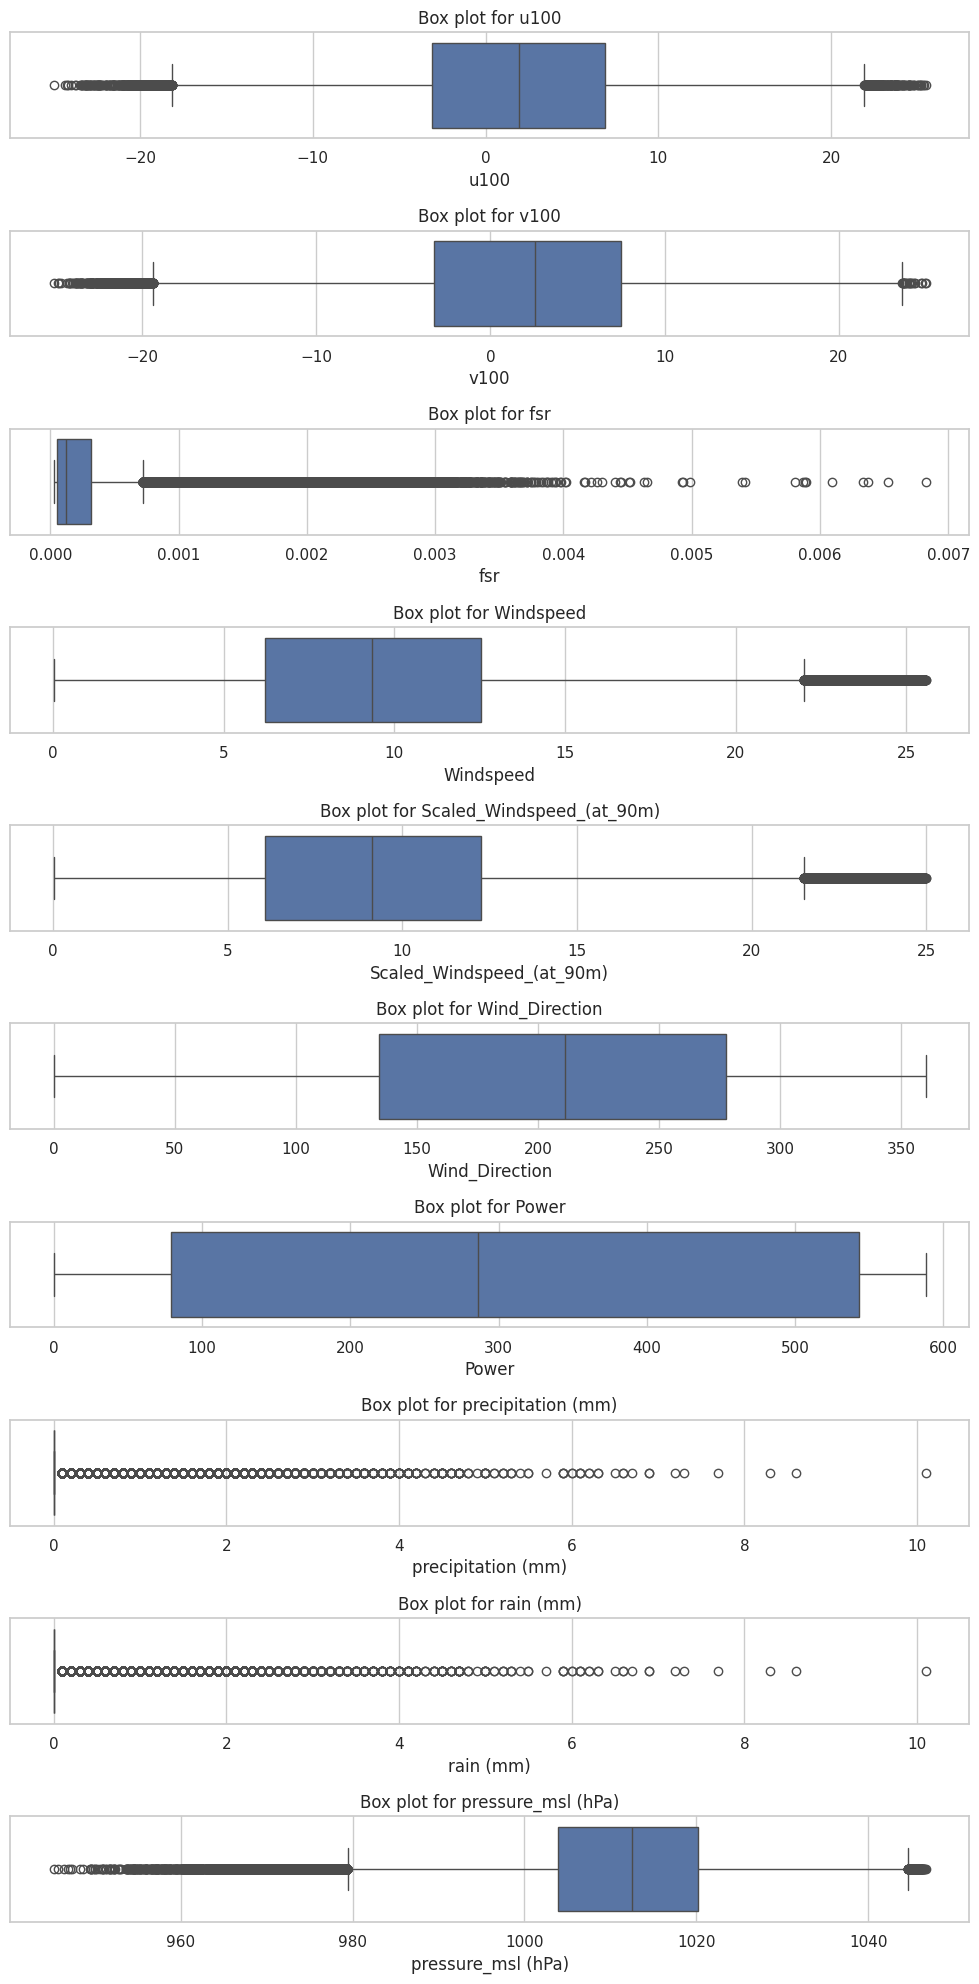

In [50]:
# Set the style of seaborn
sns.set(style="whitegrid")
# Create subplots for numeric columns
fig, axes = plt.subplots(nrows=len(numeric_data.columns), ncols=1, figsize=(10, 2*len(numeric_data.columns)))
# Create box plots for numeric columns
for i, column in enumerate(numeric_data.columns):
    sns.boxplot(x=numeric_data[column], ax=axes[i], orient='h')
    axes[i].set_title(f'Box plot for {column}')
# Adjust layout for numeric columns
plt.tight_layout()
plt.show()

Including Outliers in dataset trusting the measuring equipment

Only remove if prediction problems are detected

# Visualization of Data

### KDE plots

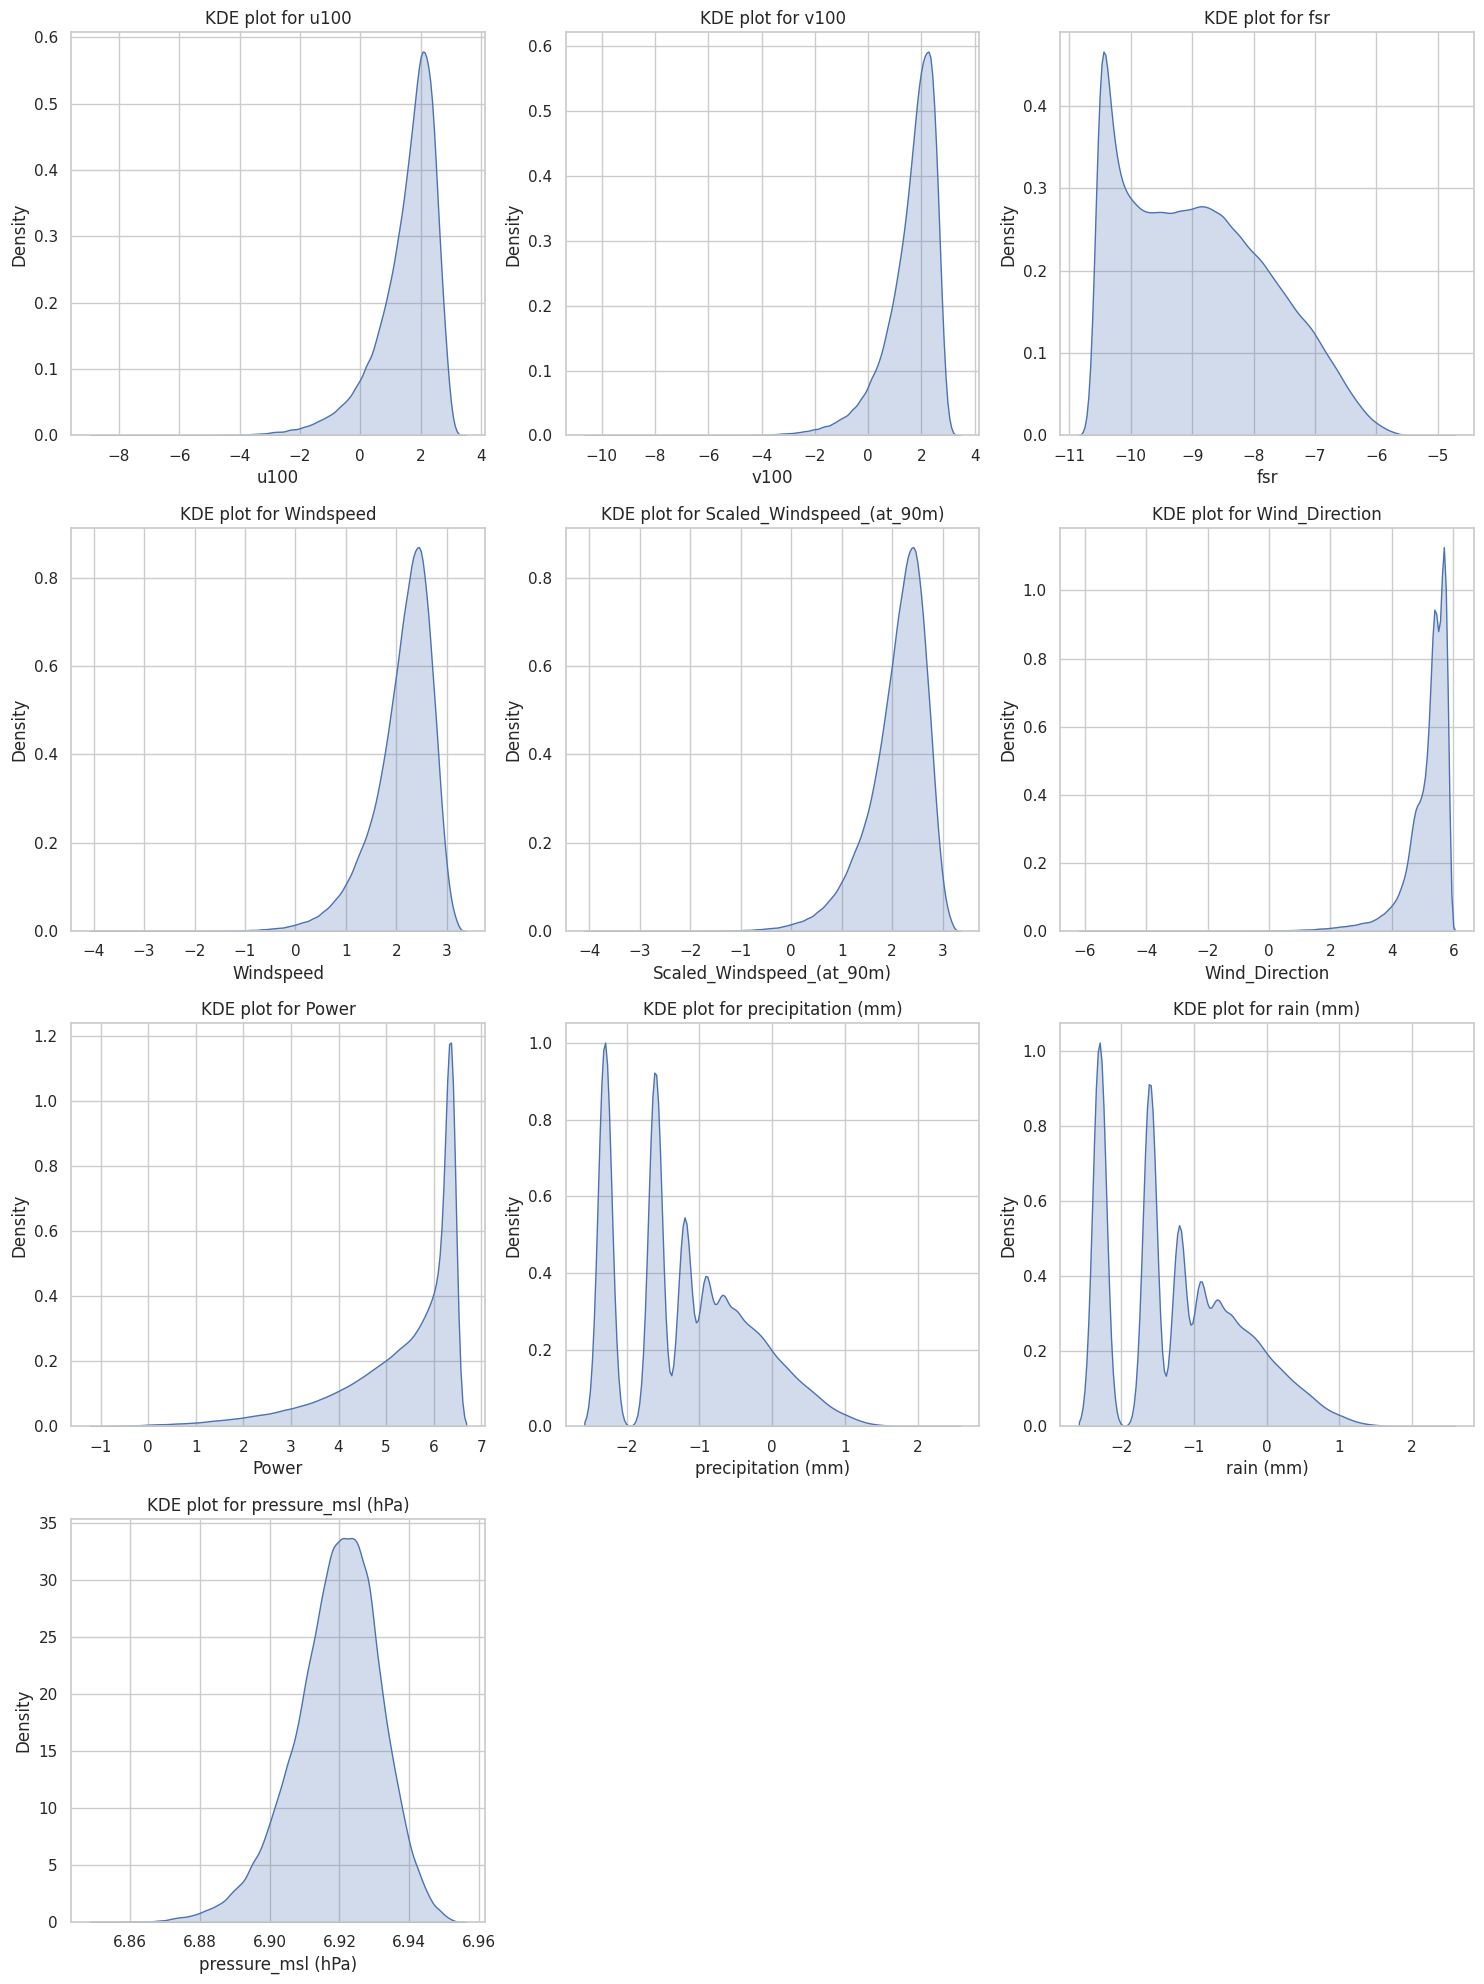

In [51]:
# Select numeric columns for KDE plots, excluding 'year' and 'month' as they are categorical
numeric_cols = data.select_dtypes(include=np.number).drop(columns=['year', 'month']).columns

# Create subplots for KDE plots
num_cols = len(numeric_cols)
num_rows = (num_cols + 2) // 3  # Calculate rows needed to accommodate 3 columns per row
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

# Flatten axes for easier iteration
axes = axes.ravel()

# Create KDE plots for each numeric column
for i, col in enumerate(numeric_cols):
    try:
      sns.kdeplot(np.log(data[col]), ax=axes[i], fill=True)
      axes[i].set_title(f'KDE plot for {col}')
    except ValueError: # Handle potential errors for non-positive values
      print(f"Skipping KDE plot for {col}: Non-positive values encountered")
      axes[i].set_title(f'KDE plot for {col} (Skipped)')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

###Histograms

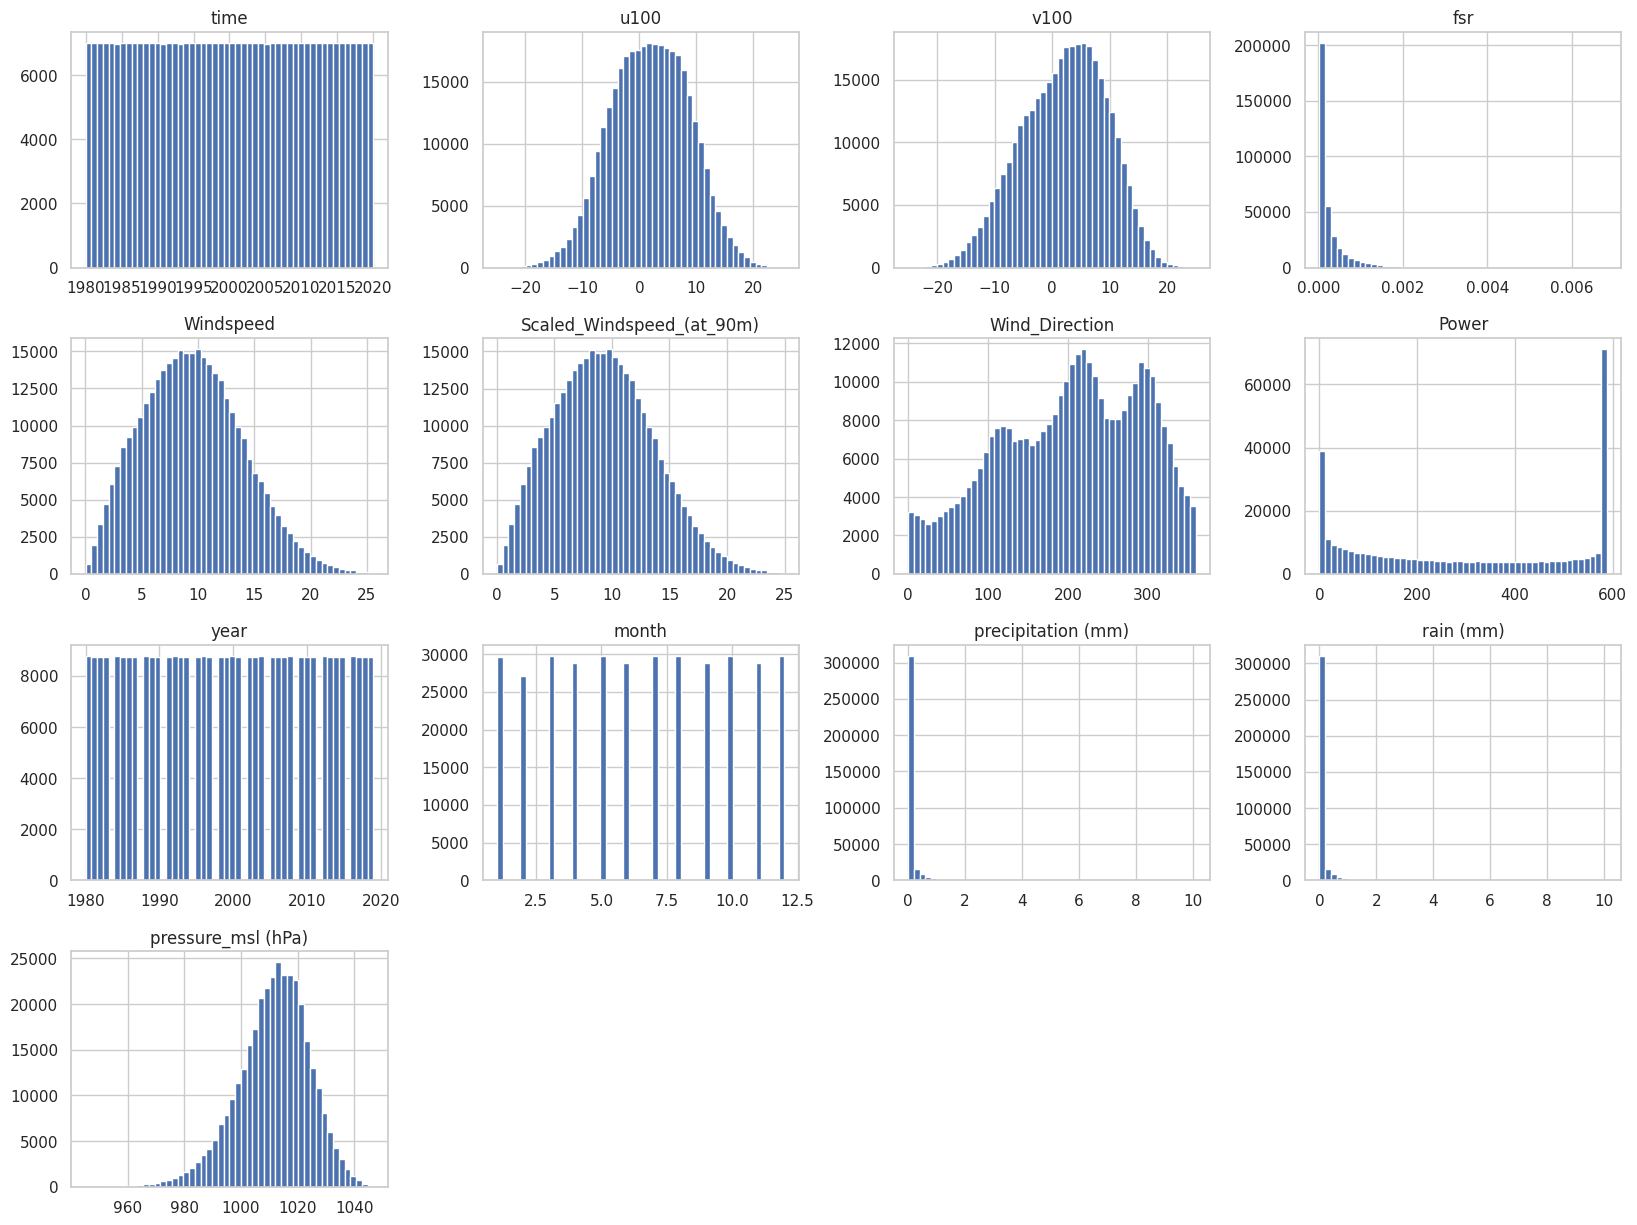

In [52]:
data.hist(bins=50, figsize=(20,15))
plt.show()

###Line plots

Take small sample of population (frac=0.1) to decrease graph density

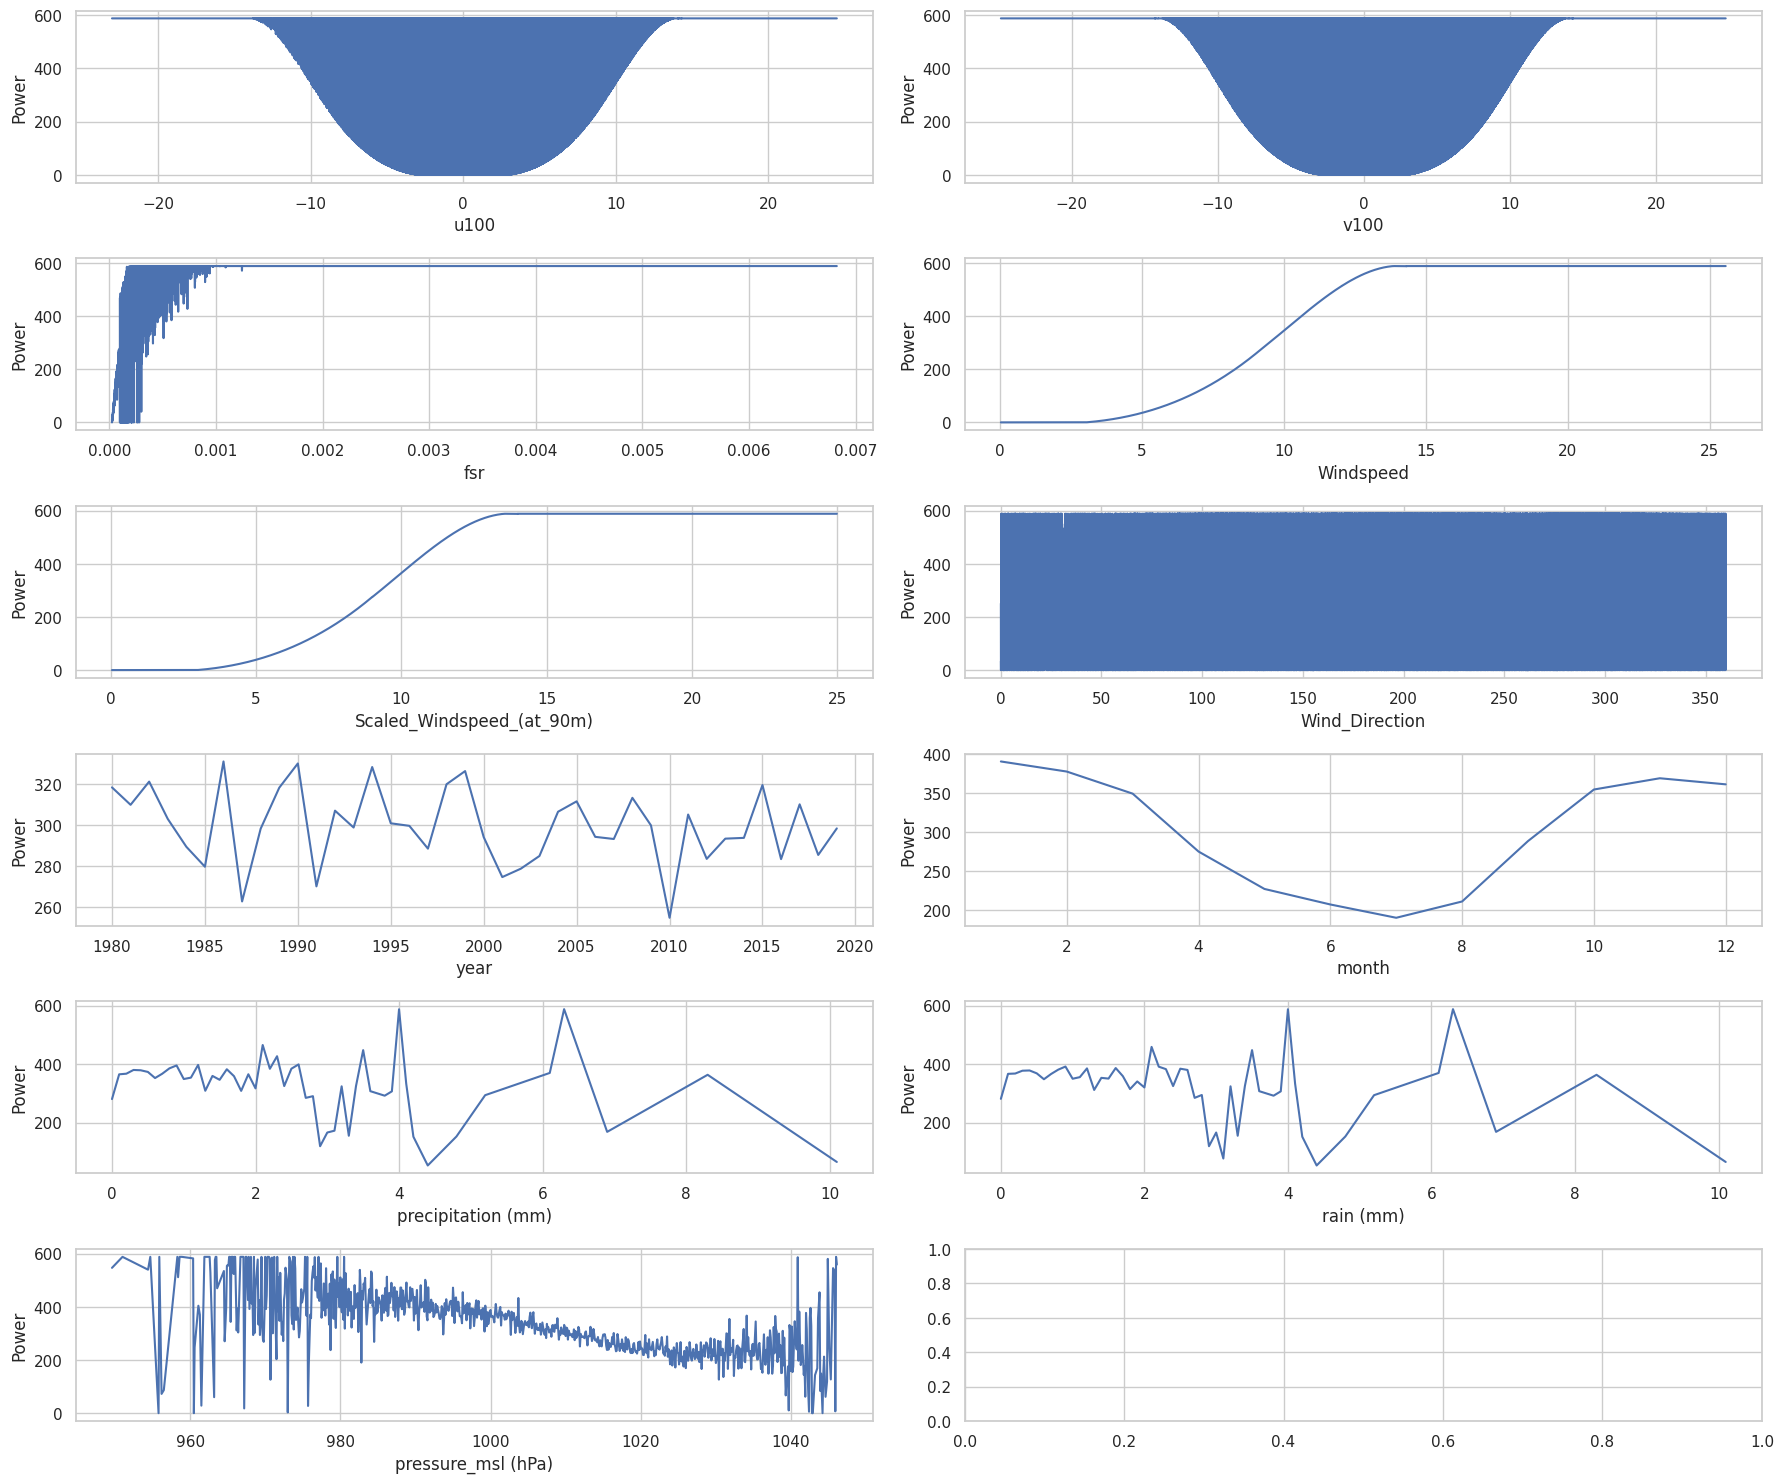

In [55]:
temp_df=data[data.columns[data.columns!='time']].sample(frac=0.1)
fig, axes = plt.subplots(6, 2, figsize=(18, 15))

sns.lineplot(data=temp_df, y="Power", x="u100", ax=axes[0, 0], ci=None).set(xlabel='u100', ylabel='Power')
sns.lineplot(data=temp_df, y="Power", x="v100", ax=axes[0, 1], ci=None).set(xlabel='v100', ylabel='Power')
sns.lineplot(data=temp_df, y="Power", x="fsr", ax=axes[1, 0], ci=None).set(xlabel='fsr', ylabel='Power')
sns.lineplot(data=temp_df, y="Power", x="Windspeed", ax=axes[1, 1], ci=None).set(xlabel='Windspeed', ylabel='Power')
sns.lineplot(data=temp_df, y="Power", x="Scaled_Windspeed_(at_90m)", ax=axes[2, 0], ci=None).set(xlabel='Scaled_Windspeed_(at_90m)', ylabel='Power')
sns.lineplot(data=temp_df, y="Power", x="Wind_Direction", ax=axes[2, 1], ci=None).set(xlabel='Wind_Direction', ylabel='Power')
sns.lineplot(data=temp_df, y="Power", x="year", ax=axes[3, 0], ci=None).set(xlabel='year', ylabel='Power')
sns.lineplot(data=temp_df, y="Power", x="month", ax=axes[3, 1], ci=None).set(xlabel='month', ylabel='Power')
sns.lineplot(data=temp_df, y="Power", x="precipitation (mm)", ax=axes[4, 0], ci=None).set(xlabel='precipitation (mm)', ylabel='Power')
sns.lineplot(data=temp_df, y="Power", x="rain (mm)", ax=axes[4, 1], ci=None).set(xlabel='rain (mm)', ylabel='Power')
sns.lineplot(data=temp_df, y="Power", x="pressure_msl (hPa)", ax=axes[5, 0], ci=None).set(xlabel='pressure_msl (hPa)', ylabel='Power')

plt.tight_layout()
plt.show()

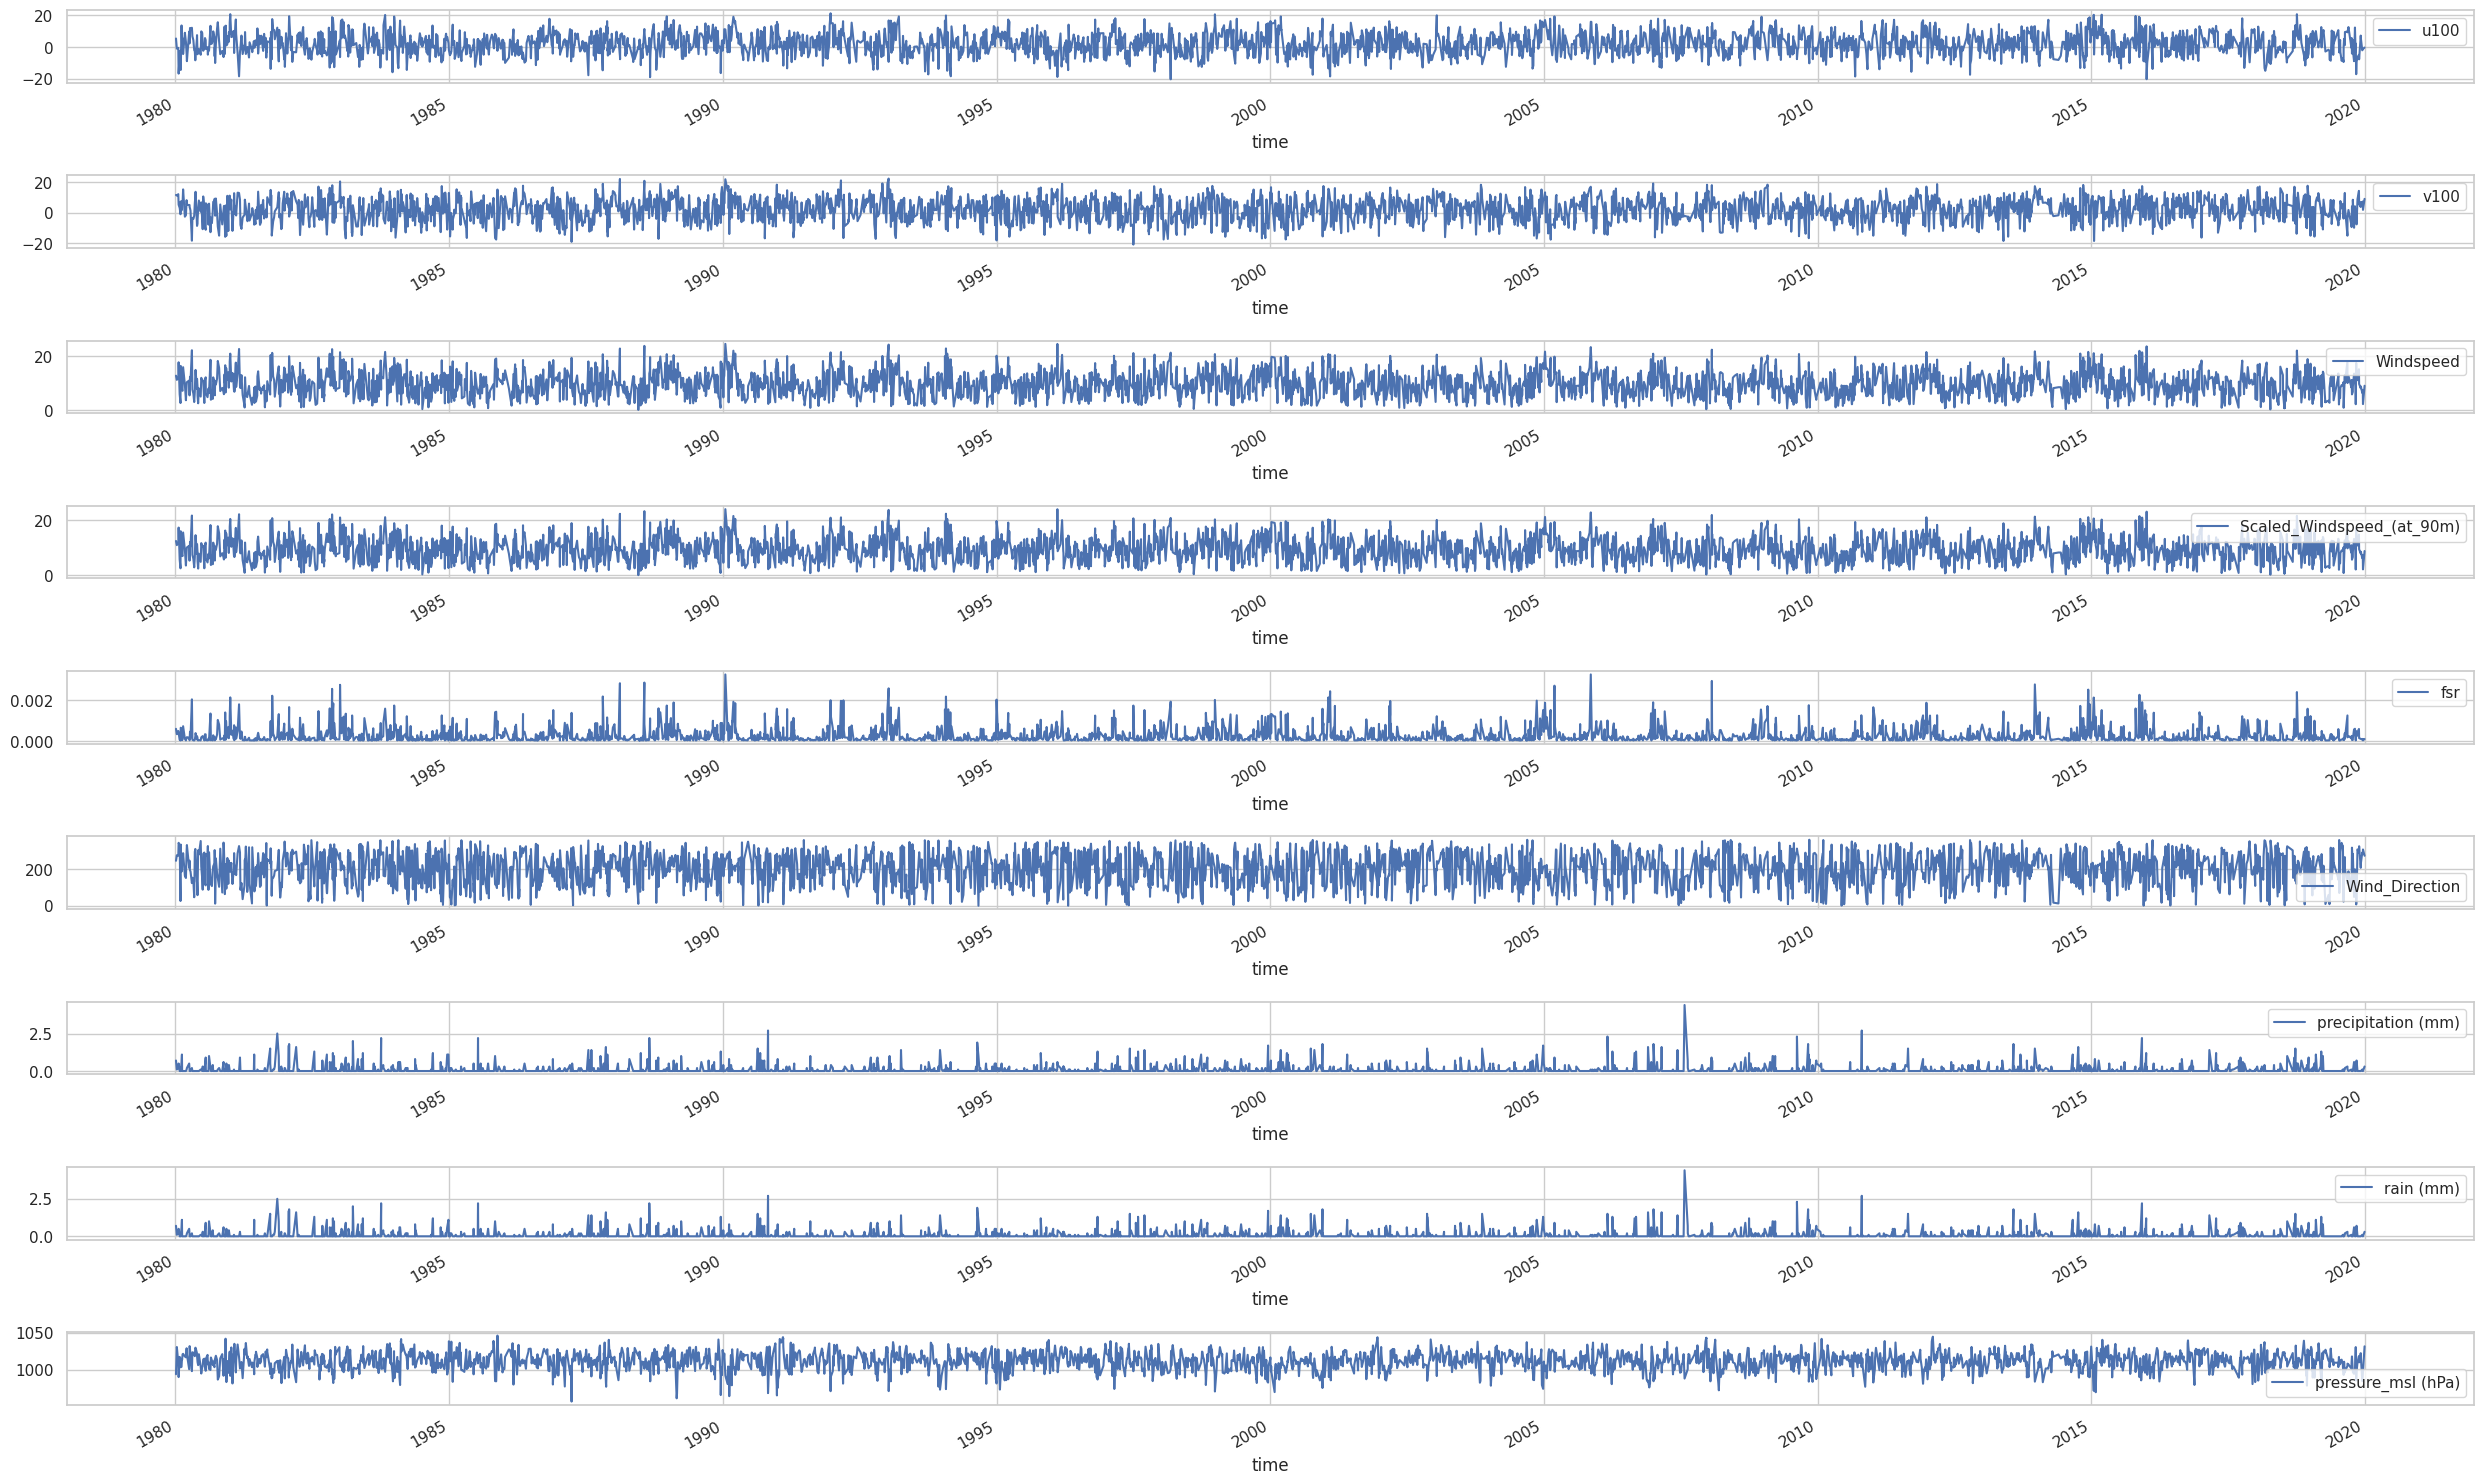

In [57]:
time_data=data.sample(frac=0.01)
time_data.sort_values(by=['time'],inplace=True)
fig, axes = plt.subplots(9,1, figsize=(25, 15))
time_data.plot('time','u100',ax=axes[0])
time_data.plot('time','v100',ax=axes[1])
time_data.plot('time','Windspeed',ax=axes[2])
time_data.plot('time','Scaled_Windspeed_(at_90m)',ax=axes[3])
time_data.plot('time','fsr',ax=axes[4])
time_data.plot('time','Wind_Direction',ax=axes[5])
time_data.plot('time','precipitation (mm)',ax=axes[6])
time_data.plot('time','rain (mm)',ax=axes[7])
time_data.plot('time','pressure_msl (hPa)',ax=axes[8])
plt.tight_layout()
plt.show()

We are taking a smaller sample of wind direction to see any trends  

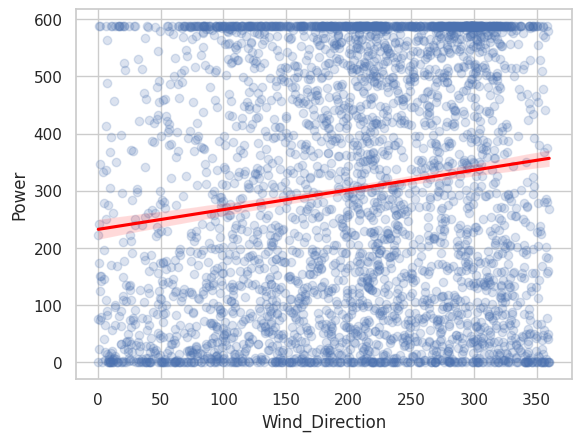

In [58]:

direction_data=data[['Wind_Direction','Power']].sample(frac=0.01)

sns.regplot(data=direction_data, y="Power", x="Wind_Direction", scatter_kws={'alpha':0.2}, line_kws={'color':'red'}).set(xlabel='Wind_Direction', ylabel='Power')
plt.show()

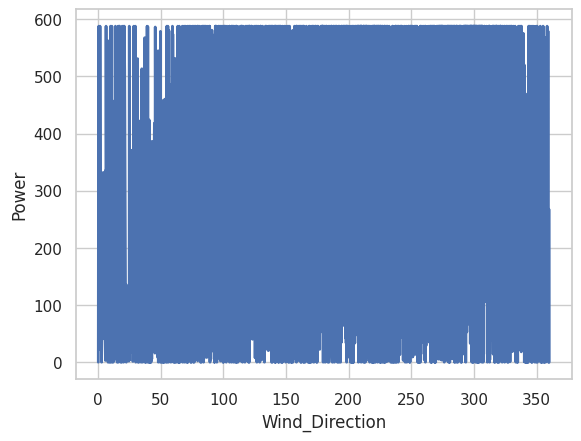

In [59]:
sns.lineplot(data=direction_data, y="Power", x="Wind_Direction", ci=None, estimator='mean', lw=2).set(xlabel='Wind_Direction', ylabel='Power')
plt.show()

<Axes: xlabel='year'>

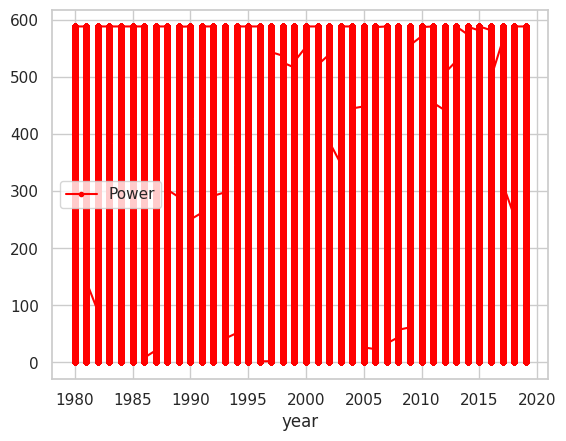

In [60]:
data.plot('year','Power',color='red',marker='.')

# Correlation Between columns

In [61]:
corr_table = round(data[data.columns].corr(method = 'pearson'), 2)
corr_table

,time,u100,v100,fsr,Windspeed,Scaled_Windspeed_(at_90m),Wind_Direction,Power,year,month,precipitation (mm),rain (mm),pressure_msl (hPa)
time,1.00,-0.01,0.02,-0.01,-0.01,-0.01,0.01,-0.01,1.00,0.02,0.02,0.02,-0.01
u100,-0.01,1.00,-0.15,0.18,0.16,0.16,-0.23,0.16,-0.01,0.01,0.06,0.07,-0.21
v100,0.02,-0.15,1.00,0.14,0.20,0.20,0.73,0.21,0.02,-0.00,-0.04,-0.04,0.17
fsr,-0.01,0.18,0.14,1.00,0.80,0.80,0.05,0.67,-0.01,-0.01,0.10,0.09,-0.31
Windspeed,-0.01,0.16,0.20,0.80,1.00,1.00,0.12,0.95,-0.01,-0.02,0.11,0.10,-0.29
Scaled_Windspeed_(at_90m),-0.01,0.16,0.20,0.80,1.00,1.00,0.12,0.95,-0.01,-0.02,0.11,0.10,-0.29
Wind_Direction,0.01,-0.23,0.73,0.05,0.12,0.12,1.00,0.13,0.01,0.01,-0.05,-0.05,0.16
Power,-0.01,0.16,0.21,0.67,0.95,0.95,0.13,1.00,-0.01,-0.01,0.10,0.10,-0.26
year,1.00,-0.01,0.02,-0.01,-0.01,-0.01,0.01,-0.01,1.00,-0.00,0.02,0.02,-0.01
month,0.02,0.01,-0.00,-0.01,-0.02,-0.02,0.01,-0.01,-0.00,1.00,0.03,0.04,-0.05


<Axes: >

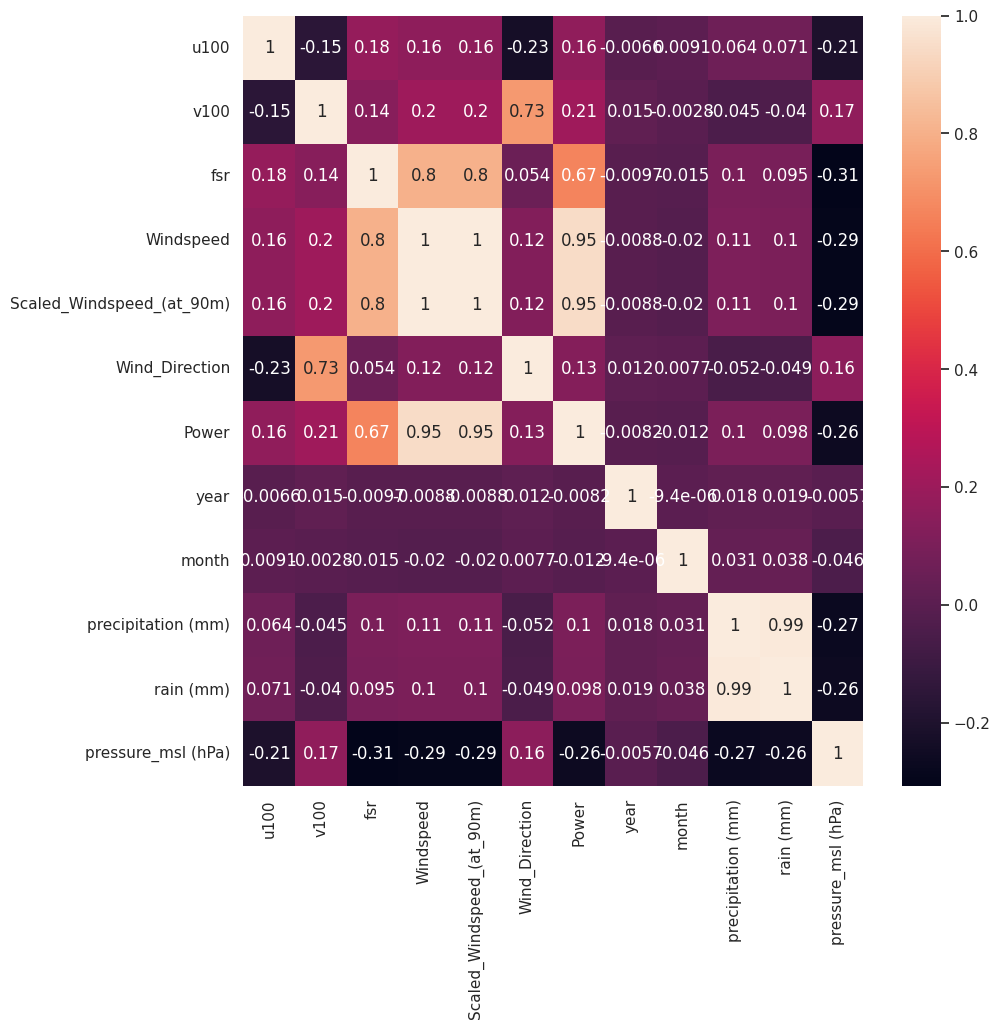

In [62]:
# HEATMAP FOR VIZUAL CORRELATION
sns.set(rc={"figure.figsize": (10,10)})
sns.heatmap(data.corr(numeric_only=True),annot=True)

# Models

##1) Linear Regression

In [63]:
### MULTIVARIATE/LINEAR REGRESSION ###
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [64]:
features=data.drop(columns=['Power','time'])
target=data['Power']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)
model = LinearRegression(n_jobs=10)
model.fit(X_train, y_train)

LinearRegression(n_jobs=10)

Model Metrics

In [66]:
print('R square:', model.score(X_test, y_test))
print('Coefficient: ', model.coef_)
print('Intercept: ', model.intercept_)

R square: 0.9469860253964181
Coefficient:  [ 3.13387042e-01  5.08345449e-01  5.23778171e+05 -6.19827142e+06
  6.34345204e+06 -3.86889618e-03  4.22959839e-03  4.86641657e-02
 -1.10091625e+01  1.22541440e+01  1.87312418e-02]
Intercept:  -227.61146225036293


This is a good R square value so we will take it as is

In [67]:
prediction = model.predict(X_test)

In [68]:
pred_df = pd.DataFrame({"Value": y_test, "Pred": prediction})
pred_df.head()

,Value,Pred
24521,438.131620,401.108079
104375,588.000000,548.439959
119187,30.614567,56.400602
60228,328.605470,332.168354
49966,226.469830,250.639897


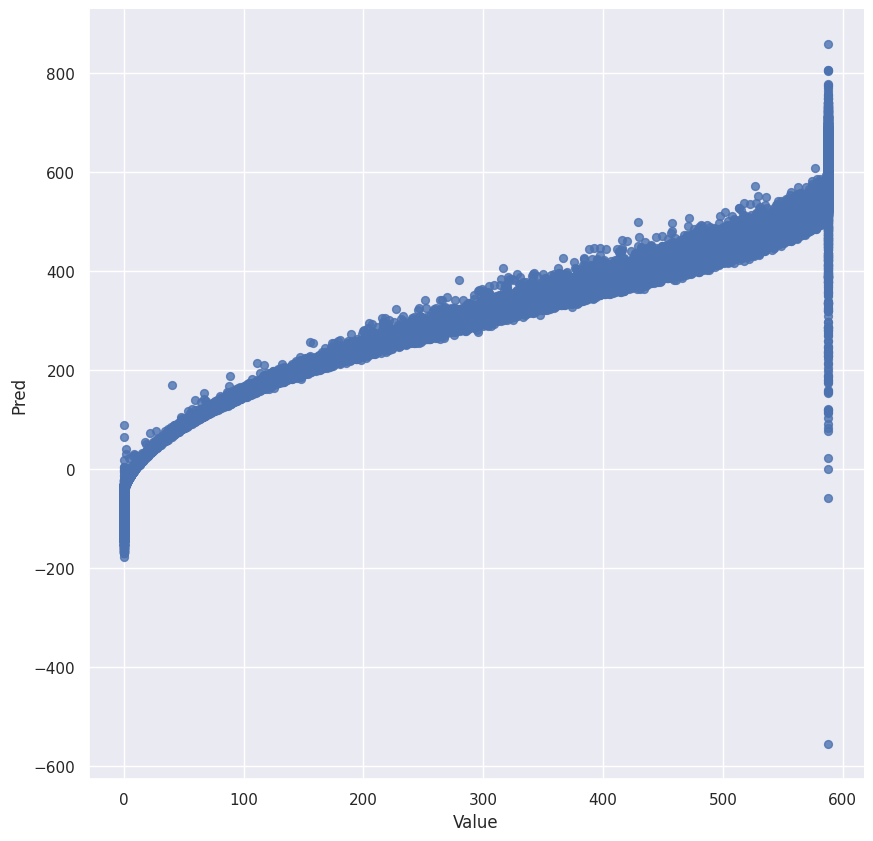

In [69]:
# Value vs Pred

from matplotlib import pyplot as plt
pred_df.plot(kind='scatter', x='Value', y='Pred', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [70]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, prediction)
mse

2596.7273208299243

### Trying Kfold Method to keep overfittiing in check

In [71]:
from sklearn.model_selection import KFold

In [72]:
X = features
y = target
#Split dataset into 10 consecutive folds
kf = KFold(n_splits=10, shuffle=True)
model = LinearRegression()
results = []
counter = 0

In [73]:
for train_index, test_index in kf.split(X):
    counter = counter + 1
    X_train, y_train = X.values[train_index], y.values[train_index]
    X_test, y_test = X.values[test_index], y.values[test_index]
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    mse = mean_squared_error(y_test, prediction)
    print(counter,":",mse)
    results.append(mse)

1 : 2520.921194941703
2 : 2607.9234204889462
3 : 2548.1316706909897
4 : 2537.5085585198076
5 : 2623.095656522166
6 : 2555.542701005777
7 : 2567.724438213938
8 : 2484.8380849341897
9 : 2593.1092483837524
10 : 2608.819531855705


In [74]:
avg_mse = np.mean(results)
print("AVERAGE MSE:", avg_mse)

AVERAGE MSE: 2564.7614505556976


Cross validation

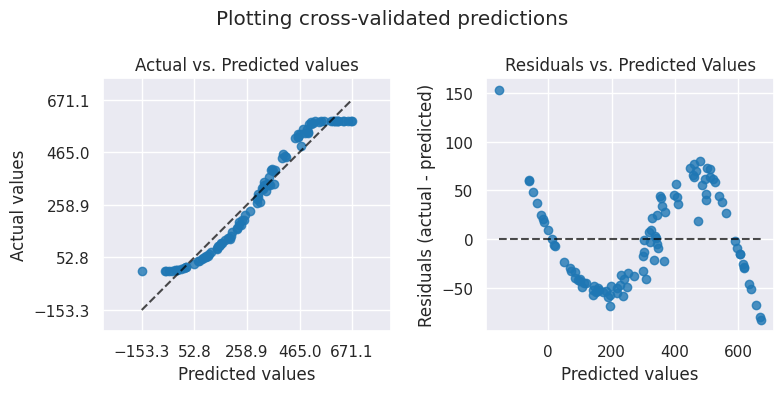

In [75]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(model, X, y, cv=10)
import matplotlib.pyplot as plt

from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

## 2) Random Forest

In [76]:
X=data.drop(columns=['Power','time'])
y=data['Power']

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=40)
model2 = RandomForestRegressor()
model2.fit(X_train,y_train)
pred2 = model2.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score
accuracy2 = model2.score(X_train,y_train)
accuracy2

0.9999999999762923

In [79]:
pred_df = pd.DataFrame({"Value": y_test, "Pred": pred2})

In [80]:
pred_df.head()

,Value,Pred
283479,5.103046,5.103175
315135,9.958982,9.958864
18609,269.647580,269.645283
142849,331.154140,331.147987
243765,414.699800,414.701874


In [81]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred2)
mse

4.834422220469829e-06

## 3) Lasso Model

In [82]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=40)

In [83]:
model3 = Lasso()
model3.fit(X_train,y_train)
pred3 = model3.predict(X_test)

In [84]:
accuracy3 = model3.score(X_train,y_train)
accuracy3

0.8944522872555826

In [85]:
pred_df = pd.DataFrame({"Value": y_test, "Pred": pred3})
pred_df.head()

,Value,Pred
283479,5.103046,14.734142
315135,9.958982,37.778300
18609,269.647580,283.174336
142849,331.154140,316.739891
243765,414.699800,366.733594


In [86]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred3)
mse

5121.317243228884

### Cross Validation

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

mean_squared_metrics = make_scorer(mean_squared_error,greater_is_better=True)
mean_error  =cross_val_score(model3,X,y ,cv=10,scoring=mean_squared_metrics)

mean_error

array([5306.42504734, 4816.10088334, 5317.54844238, 5494.96138711,
       5277.61446606, 4816.99750027, 5111.02397323, 5130.86220967,
       5358.33187314, 4984.21629653])

In [88]:
np.mean(mean_error)

5161.408207907637

Cross val visualization

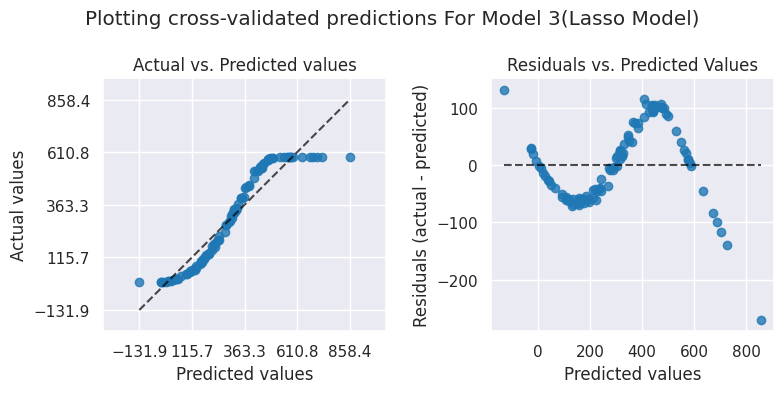

In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(model3, X, y, cv=10)

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions For Model 3(Lasso Model)")
plt.tight_layout()
plt.show()

# Save and load Models


In [92]:
import joblib

# Save Linear Regression model
joblib.dump(model, 'linear_regression_model.pkl')

# Save Random Forest model
joblib.dump(model2, 'random_forest_model.pkl')

# Save Lasso model
joblib.dump(model3, 'lasso_model.pkl')

['lasso_model.pkl']

In [91]:
# Load Linear Regression model
loaded_model = joblib.load('/content/drive/MyDrive/Windmill project/linear_regression_model.pkl')

# Load Random Forest model
loaded_model2 = joblib.load('/content/drive/MyDrive/Windmill project/random_forest_model.pkl')

# Load Lasso model
loaded_model3 = joblib.load('/content/drive/MyDrive/Windmill project/lasso_model.pkl')


## Saving the modified data
in csv format

In [93]:
data.to_csv('Beatrice_data_main.csv')